In [2]:
import numpy as np
seed = 0
rng = np.random.RandomState(seed)
def fprop(inputs, weights, biases):
    return np.dot(inputs,weights.T) + biases
'''
inputs = np.array([[0., -1., 2.], [-6., 3., 1.]])
weights = np.array([[2., -3., -1.], [-5., 7., 2.]])
biases = np.array([5., -3.])
true_outputs = np.array([[6., -6.], [-17., 50.]])

if not np.allclose(fprop(inputs, weights, biases), true_outputs):
    print('Wrong outputs computed.')
else:
    print('All outputs correct!')
'''

"\ninputs = np.array([[0., -1., 2.], [-6., 3., 1.]])\nweights = np.array([[2., -3., -1.], [-5., 7., 2.]])\nbiases = np.array([5., -3.])\ntrue_outputs = np.array([[6., -6.], [-17., 50.]])\n\nif not np.allclose(fprop(inputs, weights, biases), true_outputs):\n    print('Wrong outputs computed.')\nelse:\n    print('All outputs correct!')\n"

In [3]:
import matplotlib.pyplot as plt
import sys
#sys.path.append('/path/to/mlpractical')
from mpl_toolkits.mplot3d import Axes3D
from mlp.data_providers import CCPPDataProvider
%matplotlib notebook

data_provider = CCPPDataProvider(
    which_set='train',
    input_dims=[0, 1],
    batch_size=5000, 
    max_num_batches=1, 
    shuffle_order=False
)

input_dim, output_dim = 2, 1

inputs, targets = data_provider.next()

<IPython.core.display.Javascript object>


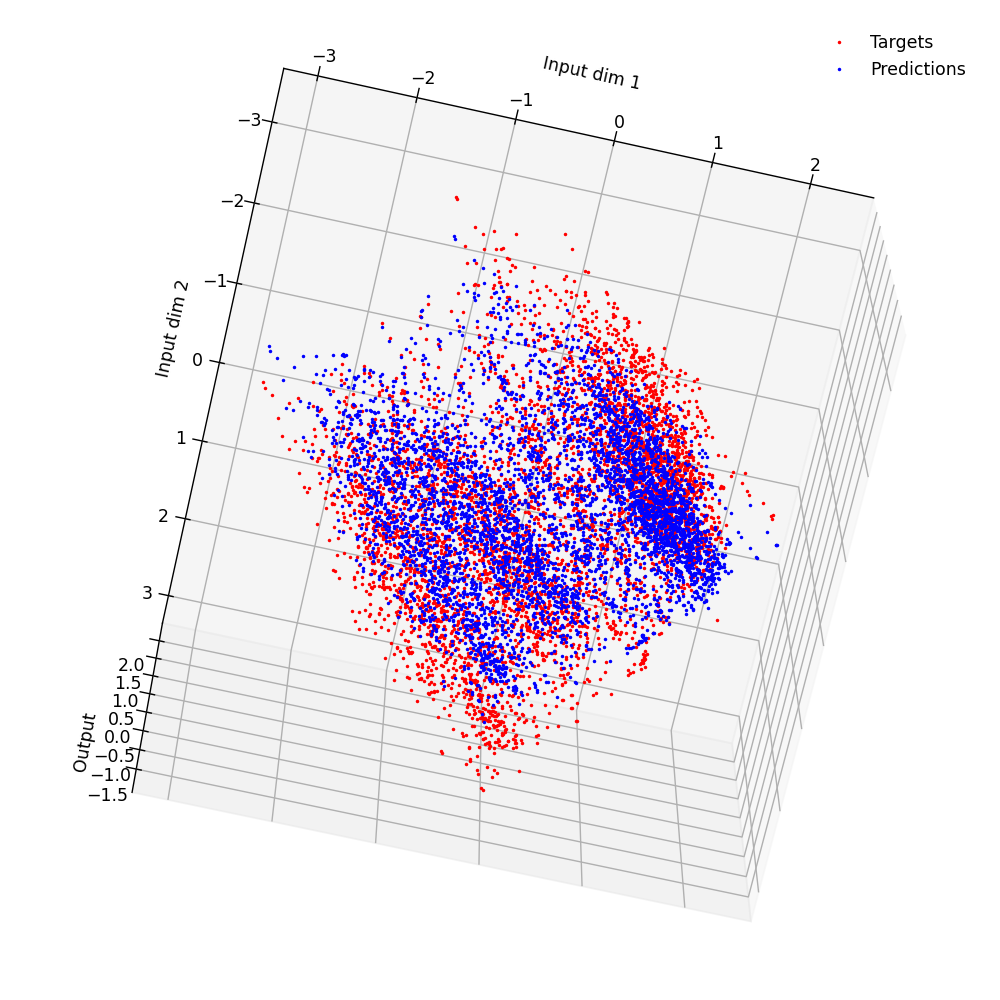

In [4]:
weights_init_range = 0.5
biases_init_range = 0.1

# Randomly initialise weights matrix
weights = rng.uniform(
    low=-weights_init_range, 
    high=weights_init_range, 
    size=(output_dim, input_dim)
)

#  Randomly initialise biases vector
biases = rng.uniform(
    low=-biases_init_range, 
    high=biases_init_range, 
    size=output_dim
)
# Calculate predicted model outputs
outputs = fprop(inputs, weights, biases)

# Plot target and predicted outputs against inputs on same axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(inputs[:, 0], inputs[:, 1], targets[:, 0], 'r.', ms=2)
ax.plot(inputs[:, 0], inputs[:, 1], outputs[:, 0], 'b.', ms=2)
ax.set_xlabel('Input dim 1')
ax.set_ylabel('Input dim 2')
ax.set_zlabel('Output')
ax.legend(['Targets', 'Predictions'], frameon=False)
fig.tight_layout()